## Moving Average

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [106]:
data = pd.read_csv('all_stocks_5yr.csv')
print (data.head())
print ('\n Data Types:')
print(data.dtypes)

         date   open   high    low  close    volume Name
0  2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL
1  2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL
2  2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL
3  2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL
4  2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL

 Data Types:
date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object


In [107]:
data.index

RangeIndex(start=0, stop=619040, step=1)

In [109]:
data['date'] = pd.to_datetime(data.date,format='%Y-%m-%d')
data.index = data['date']

In [110]:
# print(data.index)
# print(data.dtypes)
# print(data.head())

In [64]:
ts = data["open"]
print(ts.head())

date
2013-02-08    15.07
2013-02-11    14.89
2013-02-12    14.45
2013-02-13    14.30
2013-02-14    14.94
Name: open, dtype: float64


In [113]:
AAL= data.loc[data['Name']=='AAL']

Text(0.5, 1.0, 'AAL Close Price History')

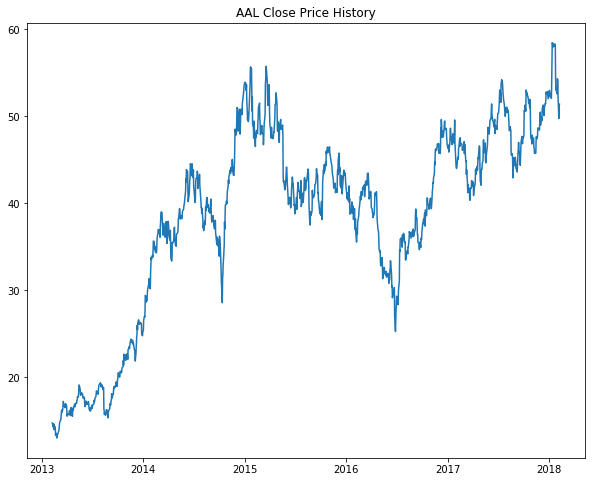

In [114]:
plt.figure(figsize=(10,8))
plt.plot(AAL['close'], label='Close Price history')
plt.title("AAL Close Price History")

In [115]:
#creating dataframe with date and the target variable
df = AAL.sort_index(ascending=True, axis=0)
#print(AAL)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['date', 'close'])
new_data = df[['date', 'close']].copy()

In [116]:
v=new_data.loc[new_data['date']>='2017']
t=new_data.loc[new_data['date']<'2017']

In [117]:
#splitting into train and validation
print(new_data.shape)
print(t.shape)
print(v.shape)
print(len(t))

(1259, 2)
(982, 2)
(277, 2)
982


In [118]:
print(t['date'].min())
print(t['date'].max())
print(v['date'].min())
print(v['date'].max())

2013-02-08 00:00:00
2016-12-30 00:00:00
2017-01-03 00:00:00
2018-02-07 00:00:00


In [119]:
#make predictions
preds = []
for i in range(0,277):
    a = t['close'][len(t)-277+i:].sum() + sum(preds)
    b = a/277
    preds.append(b)

In [120]:
#calculate rmse
rms=np.sqrt(np.mean(np.power((np.array(v['close'])-preds),2)))
print(rms)

10.147025044257898


C:\Users\Achsah\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Achsah\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


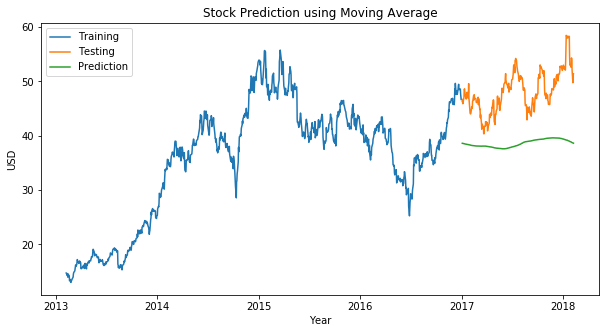

In [121]:
#plot
plt.figure(figsize=(10,5))
v['Predictions'] = 0
v['Predictions'] = preds
plt.plot(t['close'])
plt.plot(v[['close', 'Predictions']])
plt.title("Stock Prediction using Moving Average")
plt.legend(('Training','Testing','Prediction'),
           loc='upper left')
plt.xlabel('Year')
plt.ylabel('USD')
plt.show()

## Linear Regression

In [124]:
#create features
from fastai.tabular import  add_datepart
add_datepart(new_data, 'date')
new_data.drop('Elapsed', axis=1, inplace=True)  #elapsed will be the time stamp

In [125]:
#print(new_data['mon_fri'])
#print(new_data)

In [126]:
#split into train and validation
train1 = new_data[:982]
valid1 = new_data[982:]

x_train1 = train1.drop('close', axis=1)
y_train1 = train1['close']
x_valid1 = valid1.drop('close', axis=1)
y_valid1 = valid1['close']

#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train1,y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [127]:
#make predictions and find the rmse
preds1 = model.predict(x_valid1)
rms=np.sqrt(np.mean(np.power((np.array(y_valid1)-np.array(preds1)),2)))
rms

6.696901507272505

C:\Users\Achsah\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Achsah\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


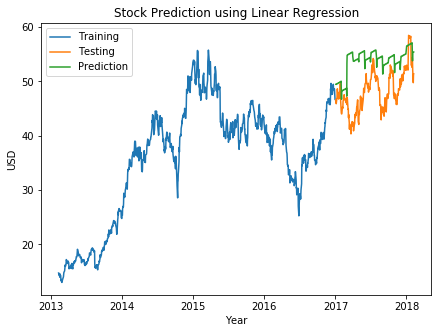

In [128]:
#plot
plt.figure(figsize=(7,5))
valid1['Predictions'] = 0
valid1['Predictions'] = preds1

valid1.index = new_data[982:].index
train1.index = new_data[:982].index

plt.plot(train1['close'])
plt.plot(valid1[['close', 'Predictions']])
plt.title("Stock Prediction using Linear Regression")
plt.legend(('Training','Testing','Prediction'),
           loc='upper left')
plt.xlabel('Year')
plt.ylabel('USD')
plt.show()

## KNN

In [129]:
#importing libraries
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [130]:
#scaling data
#x_train_scaled = scaler.fit_transform(x_train1)
#x_train = pd.DataFrame(x_train_scaled)
x_train=x_train1
#x_valid_scaled = scaler.fit_transform(x_valid1)
#x_valid = pd.DataFrame(x_valid_scaled)
x_valid=x_valid1

#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor(n_neighbors=5)
model = GridSearchCV(knn, params, cv=5)

#fit the model and make predictions
model.fit(x_train,y_train1)
preds = model.predict(x_valid)

C:\Users\Achsah\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [131]:
#rmse
rms=np.sqrt(np.mean(np.power((np.array(y_valid1)-np.array(preds)),2)))
rms

10.988656672852542

C:\Users\Achsah\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Achsah\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


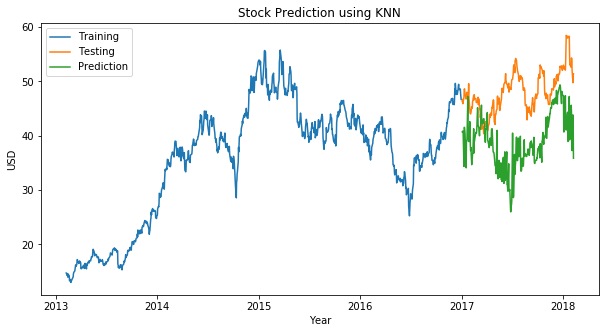

In [133]:
#plot
plt.figure(figsize=(10,5))
valid1['Predictions'] = 0
valid1['Predictions'] = preds
plt.plot(train1['close'])
plt.plot(valid1[['close']])
plt.plot(valid1[['Predictions']])
plt.title("Stock Prediction using KNN")
plt.legend(('Training','Testing','Prediction'),
           loc='upper left')
plt.xlabel('Year')
plt.ylabel('USD')
plt.show()